Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [1]:
# Import Bike Data Set
# Data source = http://archive.ics.uci.edu/ml/machine-learning-databases/00275/
# https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# https://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
names = ['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp,','hum',
         'windspeed','casual','registered','cnt']
bike  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/day.csv",header = 1, names = names )

In [2]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,"atemp,",hum,windspeed,casual,registered,cnt
0,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
3,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
4,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [3]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp,        float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

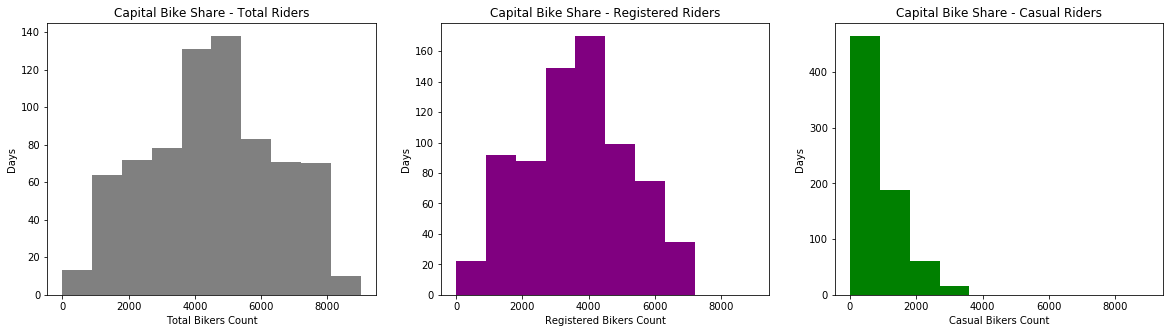

In [4]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.hist(bike['cnt'], color='gray', range=[0, 9000], )
plt.title('Capital Bike Share - Total Riders') 
plt.xlabel('Total Bikers Count')
plt.ylabel('Days')


plt.subplot(1,3,2)
plt.hist(bike['registered'], color='purple', range=[0, 9000], )
plt.title('Capital Bike Share - Registered Riders') 
plt.xlabel('Registered Bikers Count')
plt.ylabel('Days')

plt.subplot(1,3,3)
plt.hist(bike['casual'], color='green', range=[0, 9000], )
plt.title('Capital Bike Share - Casual Riders') 
plt.xlabel('Casual Bikers Count')
plt.ylabel('Days')

plt.show()

In [6]:
#  I want the seasons to be categorical
# (1:spring, 2:summer, 3:fall, 4:winter)
for elem in bike['season'].unique():
    bike[str(elem)] = bike['season'] == elem    
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,"atemp,",hum,windspeed,casual,registered,cnt,1,2,3,4
0,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False,False,False
1,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True,False,False,False
2,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True,False,False,False
3,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True,False,False,False
4,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,True,False,False,False


In [7]:
#gets a random 80% of the entire set
X = bike

X_train = X.sample(frac=0.8, random_state=1)
#gets the left out portion of the dataset
X_test = X.loc[~X.index.isin(X_train.index)]


print(len(X_train))
print(len(X_test))

584
146


### I want to predict registered riders, will look at casual riders separately (this is because when I plotted residuals for the total count, it was skewed, but when I split, both residuals were normal)

In [8]:
# Instantiate and fit our model.
from sklearn import linear_model
regr = linear_model.LinearRegression()

Y = X_train['registered']   

X = X_train[[
             'yr',
             'mnth',
             'holiday',
            'weekday',
            'workingday',
            'weathersit',
            'temp',
            'atemp,',
            'hum',
             'windspeed',
            '1','2','3','4'
            ]]

regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1715.7501083     -6.39221836  -666.10457639    45.6284205    934.27817471
  -510.98522104  1059.80075796  2514.77538637  -689.50636251 -1997.5632484
  -680.40466714    90.58775385   -17.58167874   607.39859203]

Intercept: 
 1870.50166251

R-squared:
0.822055556633


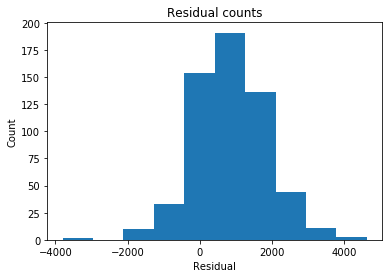

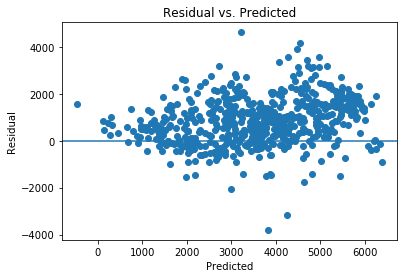

In [10]:
predicted = regr.predict(X).ravel()
actual = X_train['cnt']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.86518196  0.7879938   0.88134683  0.71315572  0.76860118]


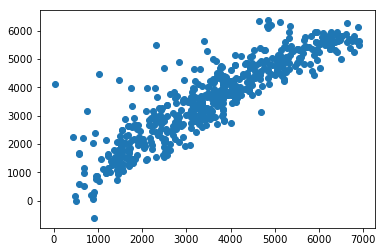

Cross-Predicted Accuracy: 0.8065298213


In [11]:
#REGISTERED MODEL
# Perform 5-fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(regr, X, Y, cv=5)
print(scores)

# Make cross validated predictions
predictions = cross_val_predict(regr, X, Y, cv=5)
plt.scatter(Y, predictions)
plt.show()

accuracy = metrics.r2_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

### Casual Model

In [12]:
# Instantiate and fit our model.
from sklearn import linear_model
regr = linear_model.LinearRegression()

YC = X_train['casual']   

XC = X_train[[
             'yr',
             'mnth',
             'holiday',
            'weekday',
            'workingday',
            'weathersit',
            'temp',
            'atemp,',
            'hum',
             'windspeed',
            '1','2','3','4'
            ]]

regr.fit(XC, YC)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

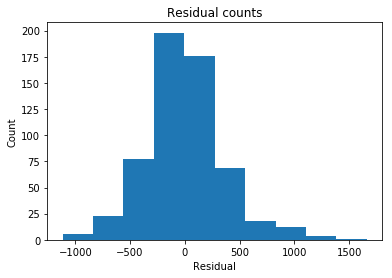

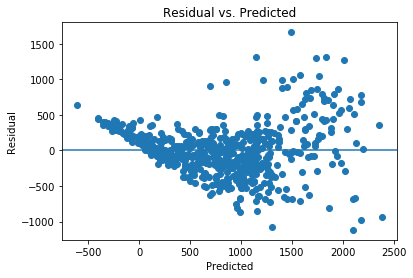

In [13]:
predicted = regr.predict(XC).ravel()
actual = X_train['casual']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

[ 0.73859767  0.73076505  0.74858807  0.66183755  0.62886373]


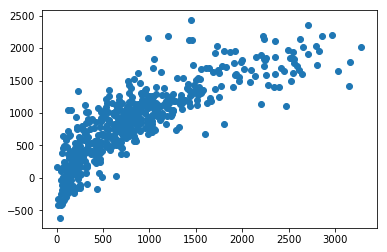

Cross-Predicted Accuracy: 0.70226175608


In [14]:
#CASUAL MODEL
# Perform 5-fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(regr, XC, YC, cv=5)
print(scores)

# Make cross validated predictions
predictions = cross_val_predict(regr, XC, YC, cv=5)
plt.scatter(YC, predictions)
plt.show()

accuracy = metrics.r2_score(YC, predictions)
print('Cross-Predicted Accuracy:', accuracy)

## Moving on the KNN Model

### Registered biker model

In [15]:
# Note the variables were normalized already by the data set creator

In [18]:
# The column that we want to predict.
y_column = ['registered']
x_columns = [
             'yr',
             'mnth',
             'holiday',
            'weekday',
            'workingday',
            'weathersit',
            'temp',
            'atemp,',
            'hum',
             'windspeed',
            '1','2','3','4'
            ]


In [19]:

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(X_train[x_columns], X_train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X_test[x_columns])

# Get the actual values for the test set.
actual = X_test[y_column]


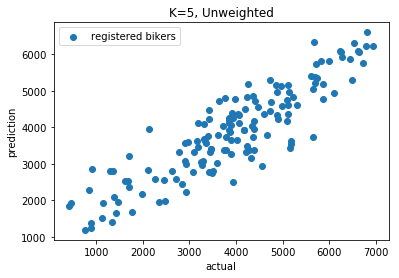

In [20]:
plt.scatter(actual, predictions, label = 'registered bikers')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('K=5, Unweighted')
plt.show()

In [23]:
## Try weighting by distance

knn_w = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
# Fit the model on the training data.
knn_w.fit(X_train[x_columns], X_train[y_column])
# Make point predictions on the test set using the fit model.
predictions_w = knn_w.predict(X_test[x_columns])

# Get the actual values for the test set.
actual_w = X_test[y_column]


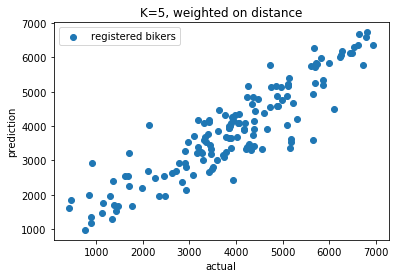

In [24]:
plt.scatter(actual_w, predictions_w, label = 'registered bikers')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('K=5, weighted on distance')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train[x_columns], X_train[y_column], cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w,X_train[x_columns],X_train[y_column], cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.74 (+/- 0.18)
Weighted Accuracy: 0.73 (+/- 0.23)


In [27]:
# I tried 3 neighbors and 10 neighbors but 5 was the best of all.

#### casual biker model

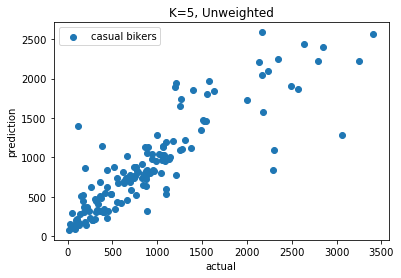

In [29]:
# The column that we want to predict.
y_column = ['casual']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(X_train[x_columns], X_train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X_test[x_columns])

# Get the actual values for the test set.
actual = X_test[y_column]

plt.scatter(actual, predictions, label = 'casual bikers')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('K=5, Unweighted')
plt.show()

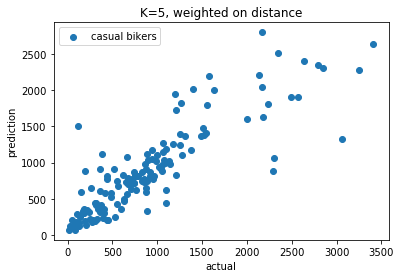

In [31]:
## Try weighting by distance

knn_w = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
# Fit the model on the training data.
knn_w.fit(X_train[x_columns], X_train[y_column])
# Make point predictions on the test set using the fit model.
predictions_w = knn_w.predict(X_test[x_columns])

# Get the actual values for the test set.
actual_w = X_test[y_column]

plt.scatter(actual_w, predictions_w, label = 'casual bikers')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('K=5, weighted on distance')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train[x_columns], X_train[y_column], cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w,X_train[x_columns],X_train[y_column], cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.75 (+/- 0.16)
Weighted Accuracy: 0.73 (+/- 0.07)


In Summary:
    * OLS for Registered ~ 80% accuracy
    * OLS for Casual ~ 70% accuracy
    * KNN (5N) for Registered ~ 80%
    * KNN (5N) for Casual ~ 71%

ASSIGNMENT: write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.

Both of my models performed almost the same so I'm not sure which one I prefer from a behavior standpoint.  I prefer the set up of the OLS regression because I would not have to normalize my variables first (this was already done by the owner of the dataset).  However, in OLS, there are key assumptions that make it more limited to use, such as: linear relationship, normal distribution of errors, homoscedasticity, and low multicollinearity.

KNN assumes that all units are equal (so comparing windspeed which may be 0 to 20mph to temperature which is likely 0 to 35 degrees would require  normalization (rescaling real valued numeric attributes into the range 0 and 1) or standardization (shifting the distribution of each attribute to have a mean of zero and a standard deviation of one).

KNN could be skewed by smaller data sets or where the spread between the points is large since it is based on similarity. So, if the points in the training set aren't similar, it will not be very accurate in its prediction.

Since my models performed about the same, I can't say what in the data caused one model to outperform the other.

KNN is better when there are non-linear relationships (OLS assumes linear). 

OLS is faster than KNN when used on large data sets. OLS also provides coefficients with which I can understand which of my variables have an impact on the outcome and by how much.

